In [1]:
# library
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#pd.options.display.max_rows = 150

In [2]:
#1. Hiển thị toàn bộ dữ liệu
data = pd.read_csv("P4AI_BT1.csv")
display(data)

#data.to_csv('Cau1.csv')

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,NaN,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,NaN,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,NaN,5.0,1.9,Virginica
147,NaN,NaN,5.2,2.0,Virginica
148,NaN,3.4,NaN,2.3,Virginica


In [3]:
#2. Điền các giá trị bị thiếu 

df = data.copy()

df['sepal.length'].fillna(round(df['sepal.length'].mean(), 1), inplace = True)
df['sepal.width'].fillna(round(df['sepal.width'].mean(), 1), inplace = True)
df['petal.length'].fillna(round(df['petal.length'].mean(), 1), inplace = True)
df['petal.width'].fillna(round(df['petal.width'].mean(), 1), inplace = True)

df['variety'].fillna(df['variety'].mode()[0], inplace = True)

display(df)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,3.7,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,1.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,3.1,5.0,1.9,Virginica
147,5.9,3.1,5.2,2.0,Virginica
148,5.9,3.4,3.7,2.3,Virginica


In [4]:
#3. Hiển thị các bản ghi có sepal.length > 5 và sepal.width > 3

df1 = df.copy()
df1[(df1['sepal.length'] > 5) & (df1['sepal.width'] > 3)]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,5.9,3.4,1.4,0.3,Setosa
7,5.9,3.4,1.5,0.2,Setosa
10,5.4,3.7,1.5,0.2,Setosa
14,5.8,3.1,1.2,0.2,Setosa
15,5.7,4.4,1.5,1.2,Setosa
16,5.4,3.9,1.3,0.4,Setosa
17,5.1,3.5,1.4,0.3,Virginica
18,5.7,3.8,1.7,1.2,Setosa


In [5]:
#4. Chuẩn hóa dữ liệu theo min max
df2 = df.copy()

sep_len_min = df2['sepal.length'].min()
sep_len_max = df2['sepal.length'].max()
df2['sepal.length'] = (df2['sepal.length'] - sep_len_min) / (sep_len_max - sep_len_min)

sep_width_min = df2['sepal.width'].min()
sep_width_max = df2['sepal.width'].max()
df2['sepal.width'] = (df2['sepal.width'] - sep_width_min) / (sep_width_max - sep_width_min)

pe_len_min = df2['petal.length'].min()
pe_len_max = df2['petal.length'].max()
df2['petal.length'] = (df2['petal.length'] - pe_len_min) / (pe_len_max - pe_len_min)

pe_width_min = df2['petal.width'].min()
pe_width_max = df2['petal.width'].max()
df2['petal.width'] = (df2['petal.width'] - pe_width_min) / (pe_width_max - pe_width_min)

df2

,sepal.length,sepal.width,petal.length,petal.width,variety
0,0.222222,0.625000,0.067797,0.041667,Setosa
1,0.166667,0.416667,0.457627,0.041667,Setosa
2,0.111111,0.500000,0.050847,0.041667,Setosa
3,0.083333,0.458333,0.084746,0.458333,Setosa
4,0.194444,0.666667,0.067797,0.041667,Setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Virginica
146,0.555556,0.458333,0.677966,0.750000,Virginica
147,0.444444,0.458333,0.711864,0.791667,Virginica
148,0.444444,0.583333,0.457627,0.916667,Virginica


In [6]:
#5. Liên tục hóa thuộc tính variety

df3 = df2.copy()
df3['variety'].unique()
dummies = pd.get_dummies(df3['variety']) # one hot endcoder
df3 = pd.concat([df3, dummies], axis = 1)
df3.drop('variety', axis = 1, inplace = True)
df3

,sepal.length,sepal.width,petal.length,petal.width,Setosa,Versicolor,Virginica
0,0.222222,0.625000,0.067797,0.041667,1,0,0
1,0.166667,0.416667,0.457627,0.041667,1,0,0
2,0.111111,0.500000,0.050847,0.041667,1,0,0
3,0.083333,0.458333,0.084746,0.458333,1,0,0
4,0.194444,0.666667,0.067797,0.041667,1,0,0
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0,0,1
146,0.555556,0.458333,0.677966,0.750000,0,0,1
147,0.444444,0.458333,0.711864,0.791667,0,0,1
148,0.444444,0.583333,0.457627,0.916667,0,0,1


In [7]:
#6. Xây dựng mô hình hồi quy tuyến tính

df4 = df3.copy()

Train = df4.drop(dummies, axis = 1)
Test = dummies

tp = int(0.9 * len(Train))
X_train = Train[:tp]
Y_train = Test[:tp]
X_test = Train[tp:] 
Y_test = Test[tp:]

reg = RidgeClassifier().fit(X_train, Y_train) 
Y_pred = reg.predict(X_test)

#display(Y_pred)
print("Độ chính xác của thuật toán là:",reg.score(X_test, Y_test))

#display(Train)
#display(Test)

Độ chính xác của thuật toán là: 0.8666666666666667


In [8]:
#7. Lấy mẫu ngẫu nhiên có lặp lại 50% dữ liệu

df5 = df3.copy()
num_sample = int(0.5 * len(df5))
df5.sample(num_sample, replace = True)

#df5.to_csv('Cau7.csv')

,sepal.length,sepal.width,petal.length,petal.width,Setosa,Versicolor,Virginica
13,0.000000,0.416667,0.016949,0.000000,1,0,0
149,0.444444,0.416667,0.694915,0.708333,0,0,1
140,0.666667,0.458333,0.457627,0.958333,0,0,1
149,0.444444,0.416667,0.694915,0.708333,0,0,1
134,0.500000,0.250000,0.779661,0.541667,0,0,1
...,...,...,...,...,...,...,...
15,0.388889,1.000000,0.084746,0.458333,1,0,0
6,0.444444,0.583333,0.067797,0.083333,1,0,0
9,0.166667,0.458333,0.084746,0.000000,0,0,1
57,0.166667,0.166667,0.389831,0.375000,0,1,0


In [9]:
#8. Rời rạc hóa thuộc tính sepal.length

df6 = df3.copy()

df6['sepal.length'] = pd.cut(df6['sepal.length'],
       bins=[-0.1, 0.2, 0.4, 0.6, 0.8, 1],
       labels=["Very Short", "Short", "Medium", "Long", "Very Long"])
df6

,sepal.length,sepal.width,petal.length,petal.width,Setosa,Versicolor,Virginica
0,Short,0.625000,0.067797,0.041667,1,0,0
1,Very Short,0.416667,0.457627,0.041667,1,0,0
2,Very Short,0.500000,0.050847,0.041667,1,0,0
3,Very Short,0.458333,0.084746,0.458333,1,0,0
4,Very Short,0.666667,0.067797,0.041667,1,0,0
...,...,...,...,...,...,...,...
145,Long,0.416667,0.711864,0.916667,0,0,1
146,Medium,0.458333,0.677966,0.750000,0,0,1
147,Medium,0.458333,0.711864,0.791667,0,0,1
148,Medium,0.583333,0.457627,0.916667,0,0,1


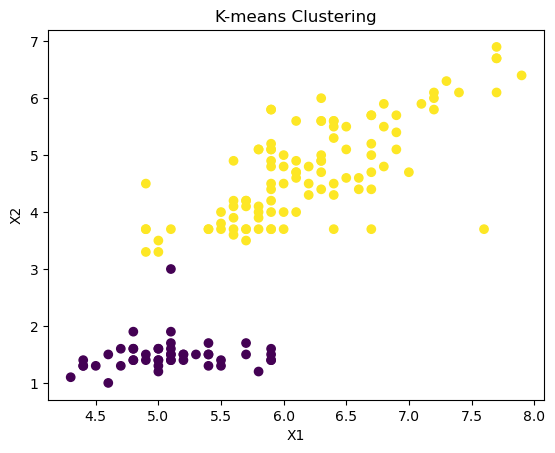

In [10]:
#9. Phân cụm dữ liệu và loại bỏ ngoại lai 

temp = df1.copy()
X = temp.iloc[:, 0:3].values
kmeans = KMeans(2)
kmeans.fit(X)
labels = kmeans.predict(X)
# Vẽ đồ thị "dot" biểu diễn kết quả của thuật toán K-means
# Phân loại theo cột đầu và cột thứ 3

plt.scatter(X[:, 0], X[:, 2], c=labels)
plt.title('K-means Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [11]:
# Loại bỏ outlier theo IQR
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm

df6 = df1.copy()
df6['variety'].replace({"Setosa":0, "Versicolor":1, "Virginica": 2}, inplace = True)

q1 = df6.quantile(0.25)
q3 = df6.quantile(0.75)

iqr = q3 - q1

# Tính giới hạn dưới và trên
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_removed = df6[((df6 >= lower_bound) & (df6 <= upper_bound)).any(axis=1)]

print("Số lượng sau khi loại bỏ outlier:", len(outliers_removed))

Số lượng sau khi loại bỏ outlier: 150
